# Calgary Taxi Services Study

Whole purpose of this study is defining best areas for establishing a Taxi service company in Calgary. Same study can be applicable to some other cities that needs the same service.

Some Valuable websites that were helpful for initial information and that the similar information has been confirmed after the data analysis.

https://moving2canada.com/where-to-live-calgary/

https://calgaryherald.com/news/local-news/calgarys-income-employment-diversity-and-more-breaking-down-the-citys-population-statistics

https://moving2canada.com/where-to-live-calgary/



# Table of Contents
<ol>
  <li>Introduction</li>
  <li>Business  </li> 
  <ol> 
  <li>Challenges</li>
  <li>Opportunities</li>
  <li>Business Scenario</li>
  </ol>
  <li>Methodology</li>
  <li>DATA  </li> 
  <ol> 
      <li>Libraries</li>
      <li>Sources</li>
      <li>Datasets</li>
      <li>Defining Datasets</li>
  </ol>
  <li>Data Analysis - First Step  </li> 
  <ol> 
  <li>Cleaning, Modification, Updates and Selection</li>
  <li>Initial Analysis</li>
  <li>Location Data</li>
  <li>Initial Clustering</li>   
  <li>Industrial Areas in Calgary</li>
  <li>Initial Results & Visuals</li>
  </ol>     
  <li>Data Analysis - Second Step  </li> 
  <ol> 
  <li>Hot Spots in Calgary - Data Cleaning, Modifying and Updates</li>
  <li>Results & Visuals</li>
  </ol>  


 
  <li>Foursquare API  </li>  
  <li>Clustering Analysis</li>
  <li>Final Results & Visuals</li>
  <li>Conclusion</li> 
</ol>    

### 1.0 Introduction

Calgary is divided into four quadrants, and the quadrants in which a particular neighbourhood of Calgary is reflected as in its street address, which ends in NW, SW, SE or NE. Avenues typically run east-west, while streets run north-south. Once you adjust to this system, navigating around Calgary becomes very easy. However, Calgary is also one of the most geographically dispersed cities in the world. Rather than high-rise multi-story apartments, housing in Calgary generally consists of separate, detached homes and buildings. Unfortunately, the public transport system in Calgary isn’t as comprehensive as those seen in other large Canadian cities and compared to some other medium scaled cities. Therefore, citizens heavily depend on either personal vehicles or select their houses very close to their job reluctantly only because of the fact that proximity and time you spend on road during travelling to your workplace is really important. Moreover, travelling between quadrants (e.g Southwest to Northeast) can be tricky on public transport, and heavy traffic congestion is also common if you have to drive across bridges during rush hour. Last but not least, hefty parking costs and high insurance costs on personel vehicles also should not be disregarded. 








### 2.0 Business

As being the golden rule: Problem for someboody can be an investment opportunity for some others.

After a high demand from local citizens and businessmen, a private well known investment firm would like to step in to the picture and would like to establish a Private Taxi Service Company in Calgary in order to meet clients demand.

This Taxi service company should provide cheap, efficient transportation services to save time and money for their customers within the city border while keeping the business profitable.  

### A. Challenges
Below are the main challenges Calgary population are facing daily interms of transportation: 
* Calgary is one of the most geographically dispersed cities in the world.
* The public transport system in Calgary isn’t as comprehensive as those seen in other large Canadian cities
* Travelling between quadrants can be tricky on public transport
* Heavy traffic congestion is also common if you have to drive across bridges during the rush hours
* Hefty parking costs
* High personal vehicle insurance costs

### B. Opportunites

Opportunities that increases the number of potential customers : 
* Some neighbourhoods are really attractive among the young Canadian adults such as universities, cafes, etc. 
* Nightlife is famous among other Canadian cities
* Calgary relies heavily on the oil and gas industry
* Many commercial and industrial enterprises are situated.

### C. Business Scenario


Calgary shows promising results for establishing a Private Taxi Service Company due to structure of the city and high number of potential customers. Also, Canada is a really safe country to invest due to its top notch business friendly government regulations. Moreover, customer class varies from mid to high within young to mid age population profile who need this type of service daily for many possible reasons such as schooling, travelling, entertainment, business, education,etc.


### 3.0 Methodology

Though it requires high investment cost, in order to be profitable and efficient against competition, company needs to establish many branches in different parts of the city to optimize transportation costs and meet customer demand.

Methodology for this study will be as following:
* In the first stage Calgary Population data will be collected and analysed.
  * Highly populated areas will be anlaysed and classified as  residential, business or industrial areas.
  * Highly populated areas will be visualized on a folium map and categorized interms of population density.
  * Top 10 to 12 locations will be determined and suitable areas for branches will be determined.
  
 
* On the second stage, hot spots\ Attractive areas will be determined.
  * Hot spots such as museums, libraries, hospitals, universities will be determined.
  * Any missing data will be parsed from wikipedia or similar websites and combined into main hotspot data frame
  * Location coordinates will be determined via folium coordinate finder
  * Finally all hot spots data will be feed in to basemap to visualize highly densed attractive areas
  
  
* 3rd stage will focus on finding all close by venues around these Hotspots
  * An access to Foursuare API will be established.
  * All venues (1000 limit) within 500 m of hotspots will be determined via Foursquare API.
  * Afterwards, a json file for all the venues will be generated.
  * Finally all localized venues will be classified 
  

* 4th stage will mainly focus on clustering venues data 
  * Clustering will be needed to determine most attractive spots in Calgary.  
  * Clustered venues data and population data will be combined and help structuring the layers on basemaps.
  * Finally, folium maps will indicate best areas and help defining sizes of each branch for Taxi Services.

### 4.0 DATA

### A. Libraries

Initially all the needed libraries, base maps, plotting tools have been imported and updated.

In [346]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.11.0 --yes

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [859]:
# library to handle data in a vectorized manner
import numpy as np 


# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from bs4 import BeautifulSoup #For web Scrabing
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium.plugins import BeautifyIcon
from folium import plugins


print('Libraries imported.')

Libraries imported.


### B. Data Sources

"Calgary data" website provided valuable datasets. 1st one is related to Population and second one is community services in Calgary.

https://data.calgary.ca/Demographics/Census-by-Community-2019/rkfr-buzb
https://data.calgary.ca/Services-and-Amenities/Community-Services/x34e-bcjz



### C. Datasets

Both files are downloaded from Calgary Data Server which are in csv format. Afterwards, we feed them into Pandas dataframe via read mode.

### D. Defining Datasets

* df            = Demographics data 
* df_community  = Community Services data (aka hotspots)


In [860]:
# Dataset to show Calgary population quantity, neighbourhoods, dwell quantity
df = pd.read_csv("Calgary_Census_by_Community_2019.csv") 
df_sum = pd.read_csv("Calgary_Census_by_Community_2019.csv") 

# Datasets for Hotspots in Calgary
df_community= pd.read_csv("Calgary_Community_Services.csv")

### 5.0 Data Analysis - First Step

### A. Cleaning & Modification & Updates & Selection

Our first step, is visually checking our Demographics data (df) dataframe. As can be seen, there are many relevant and irrelevant columns for our analysis. Some of these columns have to be dropped, cleaned or modified.

In [861]:
df.head()

,CLASS,CLASS_CODE,COMM_CODE,NAME,SECTOR,SRG,COMM_STRUCTURE,CNSS_YR,FOIP_IND,RES_CNT,DWELL_CNT,PRSCH_CHLD,ELECT_CNT,EMPLYD_CNT,OWNSHP_CNT,DOG_CNT,CAT_CNT,PUB_SCH,SEP_SCH,PUBSEP_SCH,OTHER_SCH,UNKNWN_SCH,SING_FAMLY,DUPLEX,MULTI_PLEX,APARTMENT,TOWN_HOUSE,MANUF_HOME,CONV_STRUC,COMUNL_HSE,RES_COMM,OTHER_RES,NURSING_HM,OTHER_INST,HOTEL_CNT,OTHER_MISC,APT_NO_RES,APT_OCCPD,APT_OWNED,APT_PERSON,APT_VACANT,APT_UC,APT_NA,CNV_NO_RES,CNV_OCCPD,CNV_OWNED,CNV_PERSON,CNV_VACANT,CNV_UC,CNV_NA,DUP_NO_RES,DUP_OCCPD,DUP_OWNED,DUP_PERSON,DUP_VACANT,DUP_UC,DUP_NA,MFH_NO_RES,MFH_OCCPD,MFH_OWNED,MFH_PERSON,MFH_VACANT,MFH_UC,MFH_NA,MUL_NO_RES,MUL_OCCPD,MUL_OWNED,MUL_PERSON,MUL_VACANT,MUL_UC,MUL_NA,OTH_NO_RES,OTH_OCCPD,OTH_OWNED,OTH_PERSON,OTH_VACANT,OTH_UC,OTH_NA,TWN_NO_RES,TWN_OCCPD,TWN_OWNED,TWN_PERSON,TWN_VACANT,TWN_UC,TWN_NA,SF_NO_RES,SF_OCCPD,SF_OWNED,SF_PERSON,SF_VACANT,SF_UC,SF_NA,OTH_STRTY,DWELSZ_1,DWELSZ_2,DWELSZ_3,DWELSZ_4_5,DWELSZ_6,MALE_CNT,FEMALE_CNT,MALE_0_4,MALE_5_14,MALE_15_19,MALE_20_24,MALE_25_34,MALE_35_44,MALE_45_54,MALE_55_64,MALE_65_74,MALE_75,FEM_0_4,FEM_5_14,FEM_15_19,FEM_20_24,FEM_25_34,FEM_35_44,FEM_45_54,FEM_55_64,FEM_65_74,FEM_75,MF_0_4,MF_5_14,MF_15_19,MF_20_24,MF_25_34,MF_35_44,MF_45_54,MF_55_64,MF_65_74,MF_75,OTHER_CNT,OTHER_0_4,OTHER_5_14,OTHER_15_19,OTHER_20_24,OTHER_25_34,OTHER_35_44,OTHER_45_54,OTHER_55_64,OTHER_65_74,OTHER_75,multipolygon
0,Residential,1,LEG,LEGACY,SOUTH,DEVELOPING,BUILDING OUT,2019,NaN,6420,2766,850,0,0,1826,0,0,1071,506,175,107,907,1081,356,14,1004,311,0,0,0,0,0,0,0,0,0,8,909,394,1759,83,2,2,0,0,0,0,0,0,0,0,343,308,944,8,3,1,0,0,0,0,0,0,0,0,12,9,25,2,0,0,0,0,0,0,0,0,0,2,258,222,660,7,44,0,19,949,893,3032,46,65,2,0,460,945,459,556,48,3125,3283,330,387,171,212,708,604,369,196,111,37,356,375,153,206,810,600,355,250,141,37,686,762,324,418,1518,1204,724,446,252,74,0,0,0,0,0,0,0,0,0,0,0,MULTIPOLYGON (((-114.021996041091 50.863078904...
1,Residential,1,HPK,HIGHLAND PARK,CENTRE,BUILT-OUT,1950s,2019,NaN,3838,2277,325,0,0,645,0,0,786,190,107,84,1104,823,402,45,520,24,0,460,0,2,1,0,0,0,0,0,453,70,656,62,1,2,4,302,0,484,122,5,25,3,354,214,887,39,5,1,0,0,0,0,0,0,0,0,40,0,65,5,0,0,1,2,0,0,0,0,0,0,18,0,46,4,2,0,3,743,361,1697,68,6,0,3,734,725,241,195,11,1986,1846,142,167,52,119,364,456,264,243,117,62,140,155,39,98,413,342,221,216,112,110,282,322,91,217,777,798,485,459,229,172,0,0,0,0,0,0,0,0,0,0,0,MULTIPOLYGON (((-114.0691626854784 51.09565033...
2,Residential,1,CNS,CORNERSTONE,NORTHEAST,DEVELOPING,2000s,2019,NaN,2648,1285,199,0,0,708,0,0,262,42,14,27,940,595,264,69,219,128,0,10,0,0,0,0,0,0,0,0,0,0,0,0,219,0,0,10,0,28,0,0,0,0,171,158,525,4,89,0,0,0,0,0,0,0,0,0,63,60,183,5,1,0,0,0,0,0,0,0,0,0,91,88,266,1,36,0,0,416,402,1646,3,175,0,0,13,226,154,272,85,1409,1225,136,201,63,74,275,339,137,122,54,8,81,131,65,51,332,254,124,123,64,0,217,332,128,125,607,593,261,245,118,8,0,0,0,0,0,0,0,0,0,0,0,MULTIPOLYGON (((-113.91839732026011 51.1760690...
3,Residential,1,MON,MONTGOMERY,NORTHWEST,BUILT-OUT,1950s,2019,NaN,4515,2013,328,0,0,1027,0,0,938,157,90,38,790,987,539,10,132,111,0,221,0,5,1,2,0,5,0,0,128,20,172,4,0,0,0,185,8,290,19,0,13,2,497,338,1297,16,22,0,0,0,0,0,0,0,0,0,2,0,0,0,8,0,0,8,0,331,5,0,0,0,110,42,299,1,0,0,5,915,619,2116,42,20,0,13,533,714,283,288,21,2216,2291,150,200,92,154,497,388,263,245,141,86,137,186,77,163,506,398,267,278,144,135,287,386,169,317,1003,786,530,523,285,221,0,0,0,0,0,0,0,0,0,0,0,MULTIPOLYGON (((-114.16457918083577 51.0814533...
4,Residential,1,TEM,TEMPLE,NORTHEAST,BUILT-OUT,1960s/1970s,2019,NaN,10977,3733,908,0,0,2460,0,0,1932,610,229,234,727,2304,609,1,117,424,0,277,0,0,1,0,0,0,0,0,104,19,254,13,0,0,0,199,10,402,48,0,24,0,570,360,1725,28,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,392,244,1143,27,0,0,10,2237,1827,7452,42,3,0,1,449,1078,708,961,305,5597,5357,353,813,354,369,817,870,683,712,473,153,320,767,332,333,799,857,620,702,468,159,673,1580,686,702,1616,1727,1303,1414,941,312,0,0,0,0,0,0,0,0,0,0,0,MULTIPOLYGON (((-113.93512706147847 51.0960756...


Bar chart prepared and visualised down below. It shows City has a diversified age group and majority of the people are fitting in working or studying class that can afford private cab service

In [862]:
# some column names have been changed,filtered, a new column and in a new dataframe  
# is generated.

df_sum['City']="Calgary"

df_sum_new = df_sum.filter(['City','MF_0_4','MF_5_14','MF_15_19','MF_20_24','MF_25_34','MF_35_44','MF_45_54','MF_55_64','MF_65_74','MF_75'], axis=1)
df_sum_new=df_sum_new.rename(columns={'MF_0_4':'0-4','MF_5_14':'5-14','MF_15_19':'15-19',
                           'MF_20_24':'20-24','MF_25_34':'25-34','MF_35_44':'35-44',
                           'MF_45_54':"45-54",'MF_55_64':'55-64','MF_65_74':'65-74','MF_75':'75&above'})

df_sum_new.head()

,City,0-4,5-14,15-19,20-24,25-34,35-44,45-54,55-64,65-74,75&above
0,Calgary,686,762,324,418,1518,1204,724,446,252,74
1,Calgary,282,322,91,217,777,798,485,459,229,172
2,Calgary,217,332,128,125,607,593,261,245,118,8
3,Calgary,287,386,169,317,1003,786,530,523,285,221
4,Calgary,673,1580,686,702,1616,1727,1303,1414,941,312


### B.Initial Analysis

Needed columns is filtered under a new dataframe structure called df_new. 
Initially, we are dropping "0" values and resetting index back to "0".
There is only one name which is causing issues during computation process (Douglasdale) while defining location coordinates. We are fixing it manually. 
Finally, df_new dataframe is sorted interms of descending population quantity to define highly populated neighborhoods.

In [875]:
df_new = df.filter(['CLASS','NAME','SECTOR','SRG','RES_CNT','DWELL_CNT'], axis=1)

df_new = df_new[df_new.RES_CNT != 0]
df_new=df_new.reset_index(drop=True)

#name correction for Douglasdale
df_new['NAME'][143]='DOUGLASDALE'

df_new.sort_values("RES_CNT", axis = 0, ascending = False, 
                 inplace = True)
        

df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,CLASS,NAME,SECTOR,SRG,RES_CNT,DWELL_CNT
200,Residential,PANORAMA HILLS,NORTH,DEVELOPING,25710,8199
199,Residential,BELTLINE,CENTRE,BUILT-OUT,25129,18308
66,Residential,SADDLE RIDGE,NORTHEAST,DEVELOPING,22321,6266
204,Residential,EVERGREEN,SOUTH,DEVELOPING,21500,7256
134,Residential,CRANSTON,SOUTHEAST,DEVELOPING,19884,7141


In [876]:
# 12 neighborhood names, with highest population, have been selected after visually checking the names on the map.
df_new_top12=df_new.head(12)

In [877]:
# Unique categories in dataset was checked to see how many categories are included in population class
df_new['CLASS'].unique()

array(['Residential', 'Industrial'], dtype=object)

To analyse further, A matplotlib Bar chart is generated to visualize top neighborhoods in Calgary.

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 6 Text yticklabel objects>)

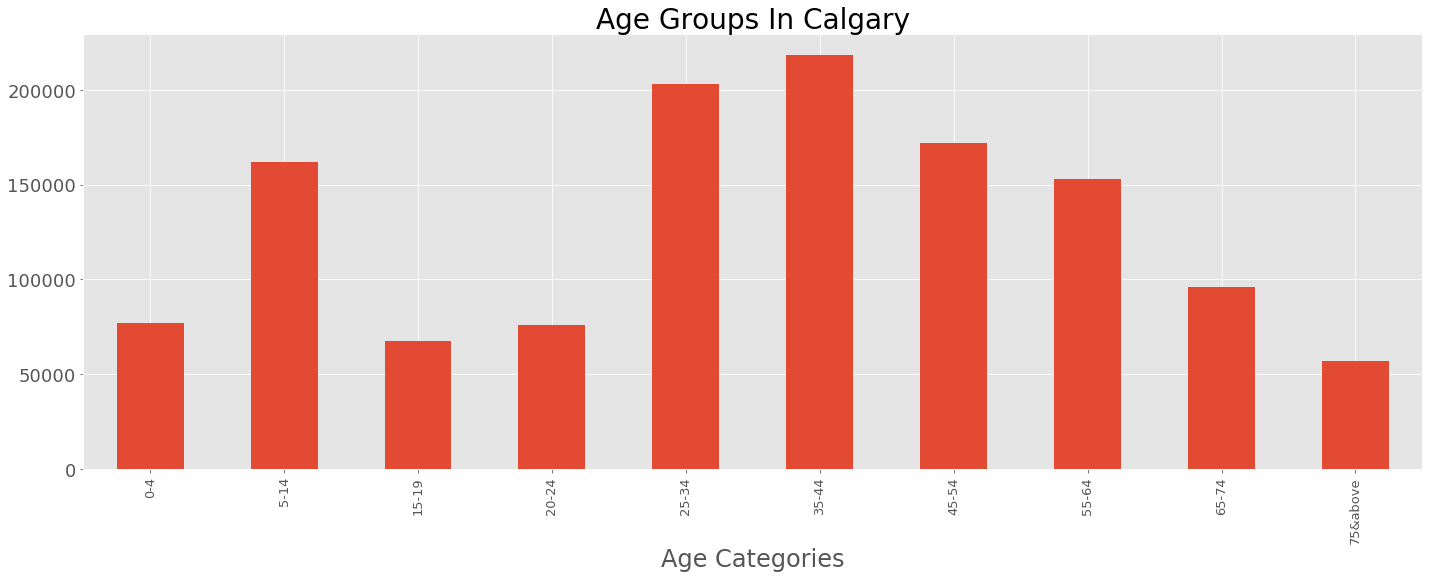

In [878]:
# sum by City
df_sum_final = df_sum_new.sum(numeric_only=True)

# plot sum
df_sum_final.plot.bar()

plt.rcParams["figure.figsize"] = [24,8]

plt.xlabel("Age Categories",fontsize=24)
plt.ylabel("",fontsize=24)
plt.title("Age Groups In Calgary",fontsize=28)
plt.xticks(fontsize=13)
plt.yticks(fontsize=18)


### C. Location Data

After filtering population quantity and neighborhood, all the location coordinates were found and assigned on needed columns through "geolocator" by only feeding neighborhood names. 

In [879]:
# Code for assigning Location coordinates

Lati=[]
Longi=[]

for x in df_new['NAME']:

    
    address1 = x+' '+'Calgary'
    geolocator = Nominatim(user_agent="Calgarypop_explorer")
    location = geolocator.geocode(address1)
    latitude = location.latitude
    longitude = location.longitude
    Lati.append(latitude)
    Longi.append(longitude)
    
    
   
    
df_new['latitude']=Lati
df_new['longitude']=Longi

### D. Initial Clustering
Tried Clustering only population data (df_new) but did not see a big benefit. Only 2 cluster sets have been generated which seperated high & low population areas. So decidedd to cluster them manually interms of 5000 people increments.


In [880]:
# just checking if df_new can be clustered interms of population
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_new[['RES_CNT']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_new["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_new[["NAME","CLASS","RES_CNT","Clus_Db",'latitude','longitude']].head()

,NAME,CLASS,RES_CNT,Clus_Db,latitude,longitude
200,PANORAMA HILLS,Residential,25710,-1,51.160946,-114.081322
199,BELTLINE,Residential,25129,-1,51.040498,-114.072593
66,SADDLE RIDGE,Residential,22321,-1,51.129706,-113.944796
204,EVERGREEN,Residential,21500,-1,50.916379,-114.111578
134,CRANSTON,Residential,19884,-1,50.878202,-113.975025


In [881]:
set(labels)

{-1, 0}


### E. Industrial Areas in Calgary

Checking if industrial areas are adding any important value by classifying "Class" column.  Observed that population living in these areas are very low whihc indicates that people working in these area are not living here. 

In [882]:
df_business=df_new[df_new['CLASS']=='Industrial']
df_business.drop(['Clus_Db'],axis=1,inplace=True)

df_business

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CLASS,NAME,SECTOR,SRG,RES_CNT,DWELL_CNT,latitude,longitude
83,Industrial,FOOTHILLS,EAST,NaN,317,1,50.995808,-113.971963
115,Industrial,SHEPARD INDUSTRIAL,SOUTHEAST,NaN,255,150,50.965241,-113.996285
70,Industrial,GREENVIEW INDUSTRIAL PARK,CENTRE,NaN,225,5,51.085320,-114.055323
123,Industrial,FOREST LAWN INDUSTRIAL,EAST,NaN,123,62,51.034673,-113.951295
62,Industrial,SADDLE RIDGE INDUSTRIAL,NORTHEAST,NaN,25,15,51.125636,-113.976720
203,Industrial,SUNRIDGE,NORTHEAST,NaN,11,8,51.075004,-113.991479


Assigned location coordinates for these places

In [883]:
# Assigning Latitude & Longitude for Location

Lati=[]
Longi=[]

for x in df_business['NAME']:

    
    address1 = x+' '+'Calgary'
    geolocator = Nominatim(user_agent="Calgarypop_explorer")
    location = geolocator.geocode(address1)
    latitude = location.latitude
    longitude = location.longitude
    Lati.append(latitude)
    Longi.append(longitude)
    
    
   
    
df_business['latitude']=Lati
df_business['longitude']=Longi

df_business.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,CLASS,NAME,SECTOR,SRG,RES_CNT,DWELL_CNT,latitude,longitude
83,Industrial,FOOTHILLS,EAST,NaN,317,1,50.995808,-113.971963
115,Industrial,SHEPARD INDUSTRIAL,SOUTHEAST,NaN,255,150,50.965241,-113.996285
70,Industrial,GREENVIEW INDUSTRIAL PARK,CENTRE,NaN,225,5,51.085320,-114.055323
123,Industrial,FOREST LAWN INDUSTRIAL,EAST,NaN,123,62,51.034673,-113.951295
62,Industrial,SADDLE RIDGE INDUSTRIAL,NORTHEAST,NaN,25,15,51.125636,-113.976720


### F. Initial Results & Visuals

Image is powerful than 1000 words !!!

Bar chart shows top 12 highly populated neighbourhoods in Calgary. First 4,red coloured, are highest populatoin spots in Calgary. 

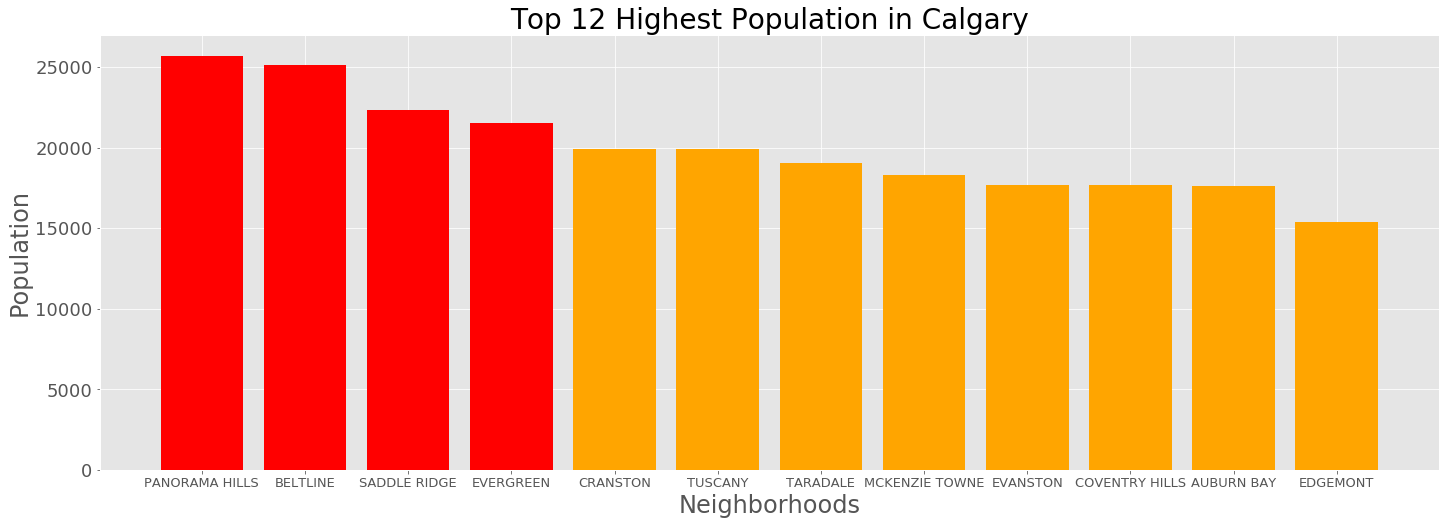

In [884]:
# BAR charts to visualize the population vs Neighborhood

plt.style.use('ggplot')


x = df_new_top12['NAME'] 
y = df_new_top12['RES_CNT']

plt.bar(x, y, color='red')
plt.rcParams["figure.figsize"] = [24,8]

plt.xlabel("Neighborhoods",fontsize=24)
plt.ylabel("Population",fontsize=24)
plt.title("Top 12 Highest Population in Calgary",fontsize=28)
plt.xticks(fontsize=13)
plt.yticks(fontsize=18)


mask1 = y < 20000
mask2 = y >= 20000

plt.bar(x[mask1], y[mask1], color = 'orange')
plt.bar(x[mask2], y[mask2], color = 'red')




plt.show()

But the beneficial one is the information gained by the folium map. Explanation is below the map....

In [886]:
# create map - This map clusters Calgary interms of population. Highly populated areas are shown in 'Purple' color
map_clust = folium.Map(location=[latitude, longitude], zoom_start=11)

kclust=3
# set color scheme for the clusters
x = np.arange(kclust)
ys = [i + x + (i*x)**2 for i in range(kclust)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

#Circle 1
folium.CircleMarker(
        [51.15,-114.085],
        radius=40,
        popup='Area 1',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 2
folium.CircleMarker(
        [51.1,-113.95],
        radius=40,
        popup='Area 2',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 3
folium.CircleMarker(
        [50.906,-113.96],
        radius=40,
        popup='Area 3',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 4
folium.CircleMarker(
        [50.909,-114.11],
        radius=20,
        popup='Area 4',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 5
folium.CircleMarker(
        [51.13,-114.225],
        radius=30,
        popup='Area 5',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 6
folium.CircleMarker(
        [51.023,-114.176],
        radius=20,
        popup='Area 6',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 7
folium.CircleMarker(
        [51.04,-114.07],
        radius=20,
        popup='Area 7',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)




markers_colors = []
for lat, lon, poi, cluster,pop in zip(df_new['latitude'], df_new['longitude'], df_new['NAME'], df_new['Clus_Db'],df_new['RES_CNT']):
    if 0<pop<5000:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=1,
            popup=label,
            color='lightgreen',
            fill=True,
            fill_color='lightgreen',
            fill_opacity=1).add_to(map_clust)
        
    elif 5000<pop<10000:
        
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=2.5,
            popup=label,
            color='darkgreen',
            fill=True,
            fill_color='darkgreen',
            fill_opacity=1).add_to(map_clust)
    elif 10000<pop<15000:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=1).add_to(map_clust)
    elif 15000<pop<20000:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=7.5,
            popup=label,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=1).add_to(map_clust)
    elif 20000<pop:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=10,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=1).add_to(map_clust)

# star marker on business \ Industrial areas
for lat, lon, poi in zip(df_business['latitude'], df_business['longitude'], df_business['NAME']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    icon_star = BeautifyIcon(
    icon='star',
    inner_icon_style='color:yellow;font-size:20px;',
    background_color='transparent',
    border_color='transparent',
)

    folium.Marker([lat, lon], tooltip='star', icon=icon_star).add_to(map_clust)
    


map_clust

Map above has 7 black circles that defines optimum areas for the branches. 
* Stars indicates industrial areas.
* Red circle indicates the highest population areas that defines neighborhood population > 20,000
* Orange circle indicates high population areas that defines neighborhood population between 15,000 to 20,000
* Blue circle indicates  med-high population areas that defines neighborhood population between 10,000 to 15,000
* Dark green circle indicates  medium population areas that defines neighborhood population between 5,000 to 10,000
* Light green circle indicates  low population areas that defines neighborhood population between 0 to 5,000

By this analysis, initial branch sizes and locations for our business are determined. However, without venues data it will be really hard to say if citizens are just visiting nearby places or staying in their houses.   

### 6.0 Data Analysis - Second Step

### A. Hot Spots in Calgary - Data Cleaning, Modifying and Updates

Defining community service locations & venues around them will help us on solving the puzzle by indicating where all the citizens visit or socialize. 

In [887]:
# Spots in Calgary such as Libraries, hospitals, Universities, local gathering places, etc.
df_community.head()

,TYPE,NAME,ADDRESS,COMM_CODE,longitude,latitude,location
0,Attraction,Glenbow Alberta Museum,130 9 AV SE,DNC,-114.061124,51.044706,"(51.04470610101934, -114.06112369577545)"
1,Community Centre,Sunalta Community Centre,1627 10 AV SW,SNA,-114.098334,51.044174,"(51.04417435024193, -114.09833433626284)"
2,Attraction,Inglewood Bird Sanctuary,2425 9 AV SE,ING,-114.008742,51.030096,"(51.030095793296894, -114.0087423751395)"
3,PHS Clinic,Thornhill Community Health Centre,6617 Centre ST NW,HUN,-114.063915,51.112186,"(51.11218619333126, -114.06391459432675)"
4,Attraction,Rocky Mountaineer Rail Tours,115 9 AV SW,DNC,-114.062450,51.044087,"(51.044087065157676, -114.06245018496966)"


In [888]:
# Unique type of community services & places are determined
df_community['TYPE'].unique()

array(['Attraction', 'Community Centre', 'PHS Clinic', 'Social Dev Ctr',
       'Library', 'Visitor Info', 'Court', 'Hospital'], dtype=object)

As observed above, college names are missing, which is an important hotspot among young people.

In [890]:
# Cleaning and modifying the dataframe

#df_community.drop(['location','COMM_CODE'],axis=1,inplace=True)  
df_community.head()



,TYPE,NAME,ADDRESS,COMM_CODE,longitude,latitude,location
0,Attraction,Glenbow Alberta Museum,130 9 AV SE,DNC,-114.061124,51.044706,"(51.04470610101934, -114.06112369577545)"
1,Community Centre,Sunalta Community Centre,1627 10 AV SW,SNA,-114.098334,51.044174,"(51.04417435024193, -114.09833433626284)"
2,Attraction,Inglewood Bird Sanctuary,2425 9 AV SE,ING,-114.008742,51.030096,"(51.030095793296894, -114.0087423751395)"
3,PHS Clinic,Thornhill Community Health Centre,6617 Centre ST NW,HUN,-114.063915,51.112186,"(51.11218619333126, -114.06391459432675)"
4,Attraction,Rocky Mountaineer Rail Tours,115 9 AV SW,DNC,-114.062450,51.044087,"(51.044087065157676, -114.06245018496966)"


In [891]:
df_community['TYPE'].unique()
# Universities are missing in the df_community dataset

array(['Attraction', 'Community Centre', 'PHS Clinic', 'Social Dev Ctr',
       'Library', 'Visitor Info', 'Court', 'Hospital'], dtype=object)

### Universities in Calgary

When unique values in df_community data frame "TYPE" column is examined, it is observed that universities & colleges are missing. Therefore, by only after scraping data from wikipedia page for "Calgary Universities & college List", we will have full picture to assess the attractive locations study. 

In [892]:
# Scraping Data from related wikipedia page
University2_url='https://en.wikipedia.org/wiki/Category:Universities_and_colleges_in_Calgary'
response=requests.get(University2_url)
soup=BeautifulSoup(response.text,'html.parser')

In [893]:
# finding specific division with specified class
colleg=soup.find_all('div',class_="mw-category-group")

In [894]:
# looping in website list, parsing college names and appending them in "unitable" list

unitable=[]

# first "for loop" loops inside class=mw-category-group and second "for Loop" loops in <a></a> section 

for m in colleg:
    for x in m.find_all('a'):
        for y in x:
            unitable.append(y)
        
unitable

['ABM College',
 'Alberta Bible College',
 'Alberta University of the Arts',
 'Ambrose University',
 'Bay River College',
 'Bow Valley College',
 'University of Calgary',
 'DeVry University',
 'Heritage College (Calgary)',
 'MaKami College',
 'Mount Royal University',
 'Provincial Institute of Technology and Arts',
 'Robertson College',
 'Rocky Mountain College, Calgary',
 'Southern Alberta Institute of Technology',
 "St. Mary's University, Calgary"]

In [895]:
#Turning list to Dataframe & cleaning data - Deleting some universities w/o location data or changing the name to match 
# the coordinates
University_df = pd.DataFrame(unitable,columns=['Name'])
University_df.drop(University_df.index[[0,4,11,12,13]], inplace=True)
University_df['Name'][7]='DeVry College Parking Lot'
University_df['Name'][12]='Robertson College'
University_df=University_df.reset_index(drop=True)

University_df.head()

,Name
0,Alberta Bible College
1,Alberta University of the Arts
2,Ambrose University
3,Bow Valley College
4,University of Calgary


In [896]:
# Assigning all addresses for Universities
University_df['ADDRESS']=['Cambrian Heights','Hillhurst','Christie Park',
                               'Radisson Heights','University Heights','Radisson Heights',
                               'Kingsland','Haysboro','Rutland Park','Hillhurst','Midnapore']

TYPE=[]
for x in range(11):
    TYPE.append('University')
    #University_df['TYPE'][x]='University'

University_df['TYPE']=TYPE
University_df

,Name,ADDRESS,TYPE
0,Alberta Bible College,Cambrian Heights,University
1,Alberta University of the Arts,Hillhurst,University
2,Ambrose University,Christie Park,University
3,Bow Valley College,Radisson Heights,University
4,University of Calgary,University Heights,University
5,DeVry College Parking Lot,Radisson Heights,University
6,Heritage College (Calgary),Kingsland,University
7,MaKami College,Haysboro,University
8,Mount Royal University,Rutland Park,University
9,Southern Alberta Institute of Technology,Hillhurst,University


In [897]:
# Defining Location coordinates: Latitude & Longitude for Universities

Lati=[]
Longi=[]

for x in University_df['Name']:

    
    address1 = x
    geolocator = Nominatim(user_agent="Calgary_explorer")
    location = geolocator.geocode(address1)
    latitude = location.latitude
    longitude = location.longitude
    Lati.append(latitude)
    Longi.append(longitude)
   
    
University_df['latitude']=Lati
University_df['longitude']=Longi

University_df.head(20)

,Name,ADDRESS,TYPE,latitude,longitude
0,Alberta Bible College,Cambrian Heights,University,51.086111,-114.089574
1,Alberta University of the Arts,Hillhurst,University,51.062053,-114.091460
2,Ambrose University,Christie Park,University,51.034574,-114.194499
3,Bow Valley College,Radisson Heights,University,51.046695,-113.997593
4,University of Calgary,University Heights,University,51.074233,-114.146284
5,DeVry College Parking Lot,Radisson Heights,University,51.047140,-113.998087
6,Heritage College (Calgary),Kingsland,University,50.978129,-114.074201
7,MaKami College,Haysboro,University,50.968586,-114.074094
8,Mount Royal University,Rutland Park,University,51.011620,-114.130657
9,Southern Alberta Institute of Technology,Hillhurst,University,51.063111,-114.087916


In [898]:
# Reordering Columns Place to match up with hotspots(community services) dataframe
University_df = University_df[['TYPE','Name','ADDRESS','longitude','latitude']]
University_df = University_df.rename(columns={'Name': 'NAME'})


University_df.head()


,TYPE,NAME,ADDRESS,longitude,latitude
0,University,Alberta Bible College,Cambrian Heights,-114.089574,51.086111
1,University,Alberta University of the Arts,Hillhurst,-114.091460,51.062053
2,University,Ambrose University,Christie Park,-114.194499,51.034574
3,University,Bow Valley College,Radisson Heights,-113.997593,51.046695
4,University,University of Calgary,University Heights,-114.146284,51.074233


By combining university information into our community services dataframe, our data set is complete, more beneficial and gives better decision options.

In [899]:

allframes = [df_community, University_df]
Calgary_Hotspot_df = pd.concat(allframes)
Calgary_Hotspot_df=Calgary_Hotspot_df.reset_index(drop=True)


### B. Results & Visuals
#### All Hotspots in Calgary

Below folium map indicates only the complete hotspots map. Also for-if loop helps to define some of the important spots in Calgary such as: Hospitals, clinics, airports, univesities, etc. 

In [900]:
address = 'Calgary'

geolocator = Nominatim(user_agent="Calgary_explorer")
location = geolocator.geocode(address)
latitude0 = location.latitude
longitude0 = location.longitude
print('The geograpical coordinate of Calgary is {}, {}.'.format(latitude0, longitude0))

map_calgary = folium.Map(location=[latitude0, longitude0], zoom_start=10)




# To define high population hot spot areas
for lat, lng, name,typ in zip(Calgary_Hotspot_df['latitude'], Calgary_Hotspot_df['longitude'], Calgary_Hotspot_df['NAME'],Calgary_Hotspot_df['TYPE']):
    if typ=='Hospital':
        label = '{}'.format(name)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_calgary)
    elif typ=='PHS Clinic':
        label = '{}'.format(name)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            popup=label,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.7,
            parse_html=False).add_to(map_calgary)
    elif typ=='University':
        label = '{}'.format(name)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            popup=label,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7,
            parse_html=False).add_to(map_calgary) 

        
    else:
        label = '{}'.format(name)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=1,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_calgary)

map_calgary

The geograpical coordinate of Calgary is 51.0534234, -114.0625892.


* Hospital = Red Circle
* Clinic = Orange Circle
* Universities = Green Circle
* Rest = Blue Circle

### 7.0 Foursquare API

Now we are in a position to connect to Foursquare API and collect venues data around these defined hot spots.
Below code helps connecting to Foursquare API by feeding in ID & passwords.

In [541]:
CLIENT_ID = 'QDDBDZXVHOS5GIYXLL3RU5RQBJDYBSKO5UONWR3C2BT0N1ID' # your Foursquare ID
CLIENT_SECRET = 'OXZJDCBS0OECXXSUTZ0FQP5OJEQOCWA4QFBIPE4B0RPYLCUR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: QDDBDZXVHOS5GIYXLL3RU5RQBJDYBSKO5UONWR3C2BT0N1ID
CLIENT_SECRET:OXZJDCBS0OECXXSUTZ0FQP5OJEQOCWA4QFBIPE4B0RPYLCUR


Below code helps collecting all venues data for all hotspots in Calgary within 1000m radius. Also, venues quantity around each hotspot is limited to 100.

In [901]:
# for multi-location Coordinates defining code

allurl=[]

for x in Calgary_Hotspot_df.index:
    neighborhood_latitude = Calgary_Hotspot_df.loc[x, 'latitude'] # neighborhood latitude value
    neighborhood_longitude = Calgary_Hotspot_df.loc[x, 'longitude'] # neighborhood longitude value

    neighborhood_name = Calgary_Hotspot_df.loc[x, 'NAME'] # neighborhood name

    #print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, neighborhood_latitude, neighborhood_longitude))
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 1000 # define radius
    # create URL

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude, 
        radius, 
        LIMIT)
    allurl.append(url)
    



In [902]:
#Turning list to Dateframe
allurl_df = pd.DataFrame(allurl,columns=['URL'])



In [903]:
#json file for the venues in Calgary extracted from Foursquare

for x in allurl_df['URL']:
    results = requests.get(x).json()

results

{'meta': {'code': 200, 'requestId': '5faad4d75111134f6b54c7d8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Southeast Calgary',
  'headerFullLocation': 'Southeast Calgary, Calgary',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 50.932361659000016,
    'lng': -114.05298113056938},
   'sw': {'lat': 50.91436164099999, 'lng': -114.08148298499628}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c65e29d7abde21e9c246268',
       'name': "Bill's Peking House",
       'location': {'address': '380 Canyon Meadows Dr SE',
        'lat': 50.93092379240533,
        'lng': -114.06382787816013,
        'labeledLatLngs': [{'label': 

In [904]:
def getNearbyVenues(names, latitudes, longitudes, radius=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [905]:
# List of all venues 
Calgary_venues = getNearbyVenues(names=Calgary_Hotspot_df['NAME'],
                                   latitudes=Calgary_Hotspot_df['latitude'],
                                   longitudes=Calgary_Hotspot_df['longitude']
                                  )



Glenbow Alberta Museum
Sunalta Community Centre
Inglewood Bird Sanctuary
Thornhill Community Health Centre
Rocky Mountaineer Rail Tours
Windsor Park Community Centre
North Hill Community Health Centre
Fish Creek Provincial Park (Bow Valley Ranch)
Tuscany Community Centre
North Glenmore Park Community Centre
Bowmont
South Area
Highland Park Community Centre
Country Hills Library
Varsity Community Centre
Fairview Community Centre
Wildwood Community Centre
Rosscarrock Community Centre
Fish Creek Provincial Park (Learning Centre)
Tourism Calgary Airport
Southwood Library
Ranchlands Community Centre
West Area
North Area
Sheldon M. Chumir Health Centre
Quarry Park Library
Ramsay Community Centre
Chaparral Residents Association
Marlborough Park Community Centre
Tourism Calgary Central Office
Calgary City Hall & Municipal Complex
Cedarbrae Community Centre
Parkdale Community Centre
Shawnessy Library
Contemporary Calgary Art Gallery
Banff Trail Community Centre
St. Andrews Heights Community Cen

In [906]:
Calgary_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Acadia Community Health Centre,1,1,1,1,1,1
Aero Space Museum of Calgary,2,2,2,2,2,2
Albert Park / Radisson Heights Community Centre,1,1,1,1,1,1
Alberta Court of Appeal,2,2,2,2,2,2
Alberta Court of Queens Bench,1,1,1,1,1,1
Alberta Provincial Court (Civil),1,1,1,1,1,1
Alberta Provincial Court (Criminal),1,1,1,1,1,1
Alberta Provincial Court (Family),1,1,1,1,1,1
Alberta Provincial Court (Rural),1,1,1,1,1,1


In [907]:
print('There are {} unique categories.'.format(len(Calgary_venues['Venue Category'].unique())))

There are 98 unique categories.


In [908]:
# one hot encoding
Calgary_onehot = pd.get_dummies(Calgary_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Calgary_onehot['Neighbourhood'] = Calgary_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Calgary_onehot.columns[-1]] + list(Calgary_onehot.columns[:-1])
Calgary_onehot = Calgary_onehot[fixed_columns]

Calgary_onehot.head()

,Neighbourhood,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,Bookstore,Brazilian Restaurant,Breakfast Spot,Building,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Country Dance Club,Department Store,Diner,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Golf Course,Grocery Store,Gym / Fitness Center,Historic Site,History Museum,Hockey Arena,Hockey Field,Hockey Rink,Hotel,Ice Cream Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Juice Bar,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sandwich Place,Science Museum,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Area,Soccer Field,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Theater,Theme Park,Thrift / Vintage Store,Tour Provider,Turkish Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Yoga Studio
0,Glenbow Alberta Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Glenbow Alberta Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Glenbow Alberta Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Glenbow Alberta Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sunalta Community Centre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [909]:
Calgary_grouped = Calgary_onehot.groupby('Neighbourhood').mean().reset_index()
Calgary_grouped.head()

,Neighbourhood,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,Bookstore,Brazilian Restaurant,Breakfast Spot,Building,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Country Dance Club,Department Store,Diner,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Golf Course,Grocery Store,Gym / Fitness Center,Historic Site,History Museum,Hockey Arena,Hockey Field,Hockey Rink,Hotel,Ice Cream Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Juice Bar,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sandwich Place,Science Museum,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Area,Soccer Field,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Theater,Theme Park,Thrift / Vintage Store,Tour Provider,Turkish Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Yoga Studio
0,Acadia Community Health Centre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aero Space Museum of Calgary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Albert Park / Radisson Heights Community Centre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alberta Court of Appeal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alberta Court of Queens Bench,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [910]:
num_top_venues = 10

for hood in Calgary_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Calgary_grouped[Calgary_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acadia Community Health Centre----
                                      venue  freq
0                        Chinese Restaurant   1.0
1                                  Pharmacy   0.0
2  Residential Building (Apartment / Condo)   0.0
3                         Recreation Center   0.0
4                                Public Art   0.0
5                                       Pub   0.0
6                                      Pool   0.0
7                                     Plaza   0.0
8                                Playground   0.0
9                               Pizza Place   0.0


----Aero Space Museum of Calgary----
                venue  freq
0      Science Museum   0.5
1         Coffee Shop   0.5
2         Art Gallery   0.0
3  Photography Studio   0.0
4   Recreation Center   0.0
5          Public Art   0.0
6                 Pub   0.0
7                Pool   0.0
8               Plaza   0.0
9          Playground   0.0


----Albert Park / Radisson Heights Community Centre----
      

In [911]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [912]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Calgary_grouped['Neighbourhood']

for ind in np.arange(Calgary_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Calgary_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acadia Community Health Centre,Chinese Restaurant,Yoga Studio,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Golf Course,Grocery Store
1,Aero Space Museum of Calgary,Science Museum,Coffee Shop,Yoga Studio,Gym / Fitness Center,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden
2,Albert Park / Radisson Heights Community Centre,Rock Club,Yoga Studio,Gym / Fitness Center,Farmers Market,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden
3,Alberta Court of Appeal,Market,Breakfast Spot,Yoga Studio,Historic Site,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden
4,Alberta Court of Queens Bench,Light Rail Station,Farm,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Golf Course,Grocery Store


In [913]:
# Calgary_grouped.shape
Calgary_grouped.head()

,Neighbourhood,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,Bookstore,Brazilian Restaurant,Breakfast Spot,Building,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Country Dance Club,Department Store,Diner,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Golf Course,Grocery Store,Gym / Fitness Center,Historic Site,History Museum,Hockey Arena,Hockey Field,Hockey Rink,Hotel,Ice Cream Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Juice Bar,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sandwich Place,Science Museum,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Area,Soccer Field,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Theater,Theme Park,Thrift / Vintage Store,Tour Provider,Turkish Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Yoga Studio
0,Acadia Community Health Centre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aero Space Museum of Calgary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Albert Park / Radisson Heights Community Centre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alberta Court of Appeal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alberta Court of Queens Bench,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 8.0 Clustering

All venues are collected and grouped. Now we can cluster venues and observe which part of Calgary has the most diverse options for citizens which in return also help us defining most attractive places and highest customer potential for the Taxi Services.  

In [919]:
# set number of clusters
kclusters = 2

Calgary_grouped_clustering = Calgary_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=12,random_state=0).fit(Calgary_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels=kmeans.labels_


In [920]:
Calgary_grouped_clustering['Labels']=labels

Calgary_grouped_clustering.head()

,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,Bookstore,Brazilian Restaurant,Breakfast Spot,Building,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Country Dance Club,Department Store,Diner,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Golf Course,Grocery Store,Gym / Fitness Center,Historic Site,History Museum,Hockey Arena,Hockey Field,Hockey Rink,Hotel,Ice Cream Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Juice Bar,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sandwich Place,Science Museum,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Area,Soccer Field,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Theater,Theme Park,Thrift / Vintage Store,Tour Provider,Turkish Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Yoga Studio,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [921]:
Calgary_grouped_clustering.groupby('Labels').mean()

,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Baseball Field,Bookstore,Brazilian Restaurant,Breakfast Spot,Building,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Country Dance Club,Department Store,Diner,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Golf Course,Grocery Store,Gym / Fitness Center,Historic Site,History Museum,Hockey Arena,Hockey Field,Hockey Rink,Hotel,Ice Cream Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Juice Bar,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Mexican Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sandwich Place,Science Museum,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Ski Area,Soccer Field,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Theater,Theme Park,Thrift / Vintage Store,Tour Provider,Turkish Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Yoga Studio
Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.008378,0.002336,0.011682,0.011215,0.004206,0.009346,0.028037,0.010125,0.001168,0.004673,0.014019,0.019697,0.018692,0.001869,0.061757,0.002336,0.009346,0.009346,0.002336,0.009346,0.000935,0.004673,0.018692,0.002336,0.009346,0.011682,0.001038,0.001168,0.004673,0.007009,0.009346,0.009346,0.014019,0.018692,0.040498,0.001869,0.014019,0.04081,0.003115,0.012461,0.005919,0.004984,0.001869,0.000935,0.004413,0.003115,0.003115,0.014019,0.003115,0.001869,0.005452,0.004673,0.009346,0.005919,0.002336,0.001168,0.017171,0.004673,0.007721,0.035826,0.017053,0.003115,0.004673,0.003115,0.004673,0.006542,0.03271,0.004796,0.004673,0.01729,0.003965,0.023364,0.012461,0.018002,0.011215,0.004206,0.014019,0.001869,0.001168,0.009346,0.077882,0.004673,0.009346,0.003037,0.009346,0.015287,0.001168,0.009346,0.003115,0.028094,0.004206,0.009346,0.003115,0.001038,0.005452,0.004673,0.004673,0.004673


In [922]:
# add clustering labels
#neighbourhoods_venues_sorted.drop(['ClusterLabels'],axis=1,inplace=True)

neighbourhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

Calgary_Hotspot_df_final = Calgary_Hotspot_df



In [923]:


# merge neighbourhoods_venues_sorted with Calgary_Hotspot_df_final to add latitude/longitude for each neighborhood
Calgary_Hotspot_df_final = Calgary_Hotspot_df_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='NAME')



In [924]:
Calgary_Hotspot_df_final.dropna(subset = ['ClusterLabels'], inplace=True)
Calgary_Hotspot_df_final.ClusterLabels=Calgary_Hotspot_df_final.ClusterLabels.astype(int)

In [926]:
Calgary_Hotspot_df_final.head()

# Final dataframe showing all location coordinates along with their cluster labels

,TYPE,NAME,ADDRESS,COMM_CODE,longitude,latitude,location,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Attraction,Glenbow Alberta Museum,130 9 AV SE,DNC,-114.061124,51.044706,"(51.04470610101934, -114.06112369577545)",1,Italian Restaurant,Museum,Coffee Shop,Performing Arts Venue,Yoga Studio,Historic Site,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store
1,Community Centre,Sunalta Community Centre,1627 10 AV SW,SNA,-114.098334,51.044174,"(51.04417435024193, -114.09833433626284)",1,Light Rail Station,Public Art,Art Gallery,Vietnamese Restaurant,Gym / Fitness Center,Farmers Market,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint
4,Attraction,Rocky Mountaineer Rail Tours,115 9 AV SW,DNC,-114.062450,51.044087,"(51.044087065157676, -114.06245018496966)",1,New American Restaurant,Restaurant,Performing Arts Venue,Steakhouse,Gym / Fitness Center,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store
6,PHS Clinic,North Hill Community Health Centre,1527 19 ST NW,HOU,-114.106507,51.065322,"(51.06532159267874, -114.10650709115143)",1,Yoga Studio,Pizza Place,Farm,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Golf Course
9,Community Centre,North Glenmore Park Community Centre,2231 Longridge DR SW,NGM,-114.112060,50.998117,"(50.99811739400991, -114.11206037488374)",1,Country Dance Club,Yoga Studio,Historic Site,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Fruit & Vegetable Store,Garden,Golf Course


### 9.0 Final Results & Visuals

Following map indicates that most attractive zone is the center of Calgary (Purple Circle) where all different type of venues are located. This area is also the best place for the main office (headquarters).

In [927]:
# create cluster map for Attraction Map
map_clusters = folium.Map(location=[51.03,-114.055323], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, name, cluster,ty in zip(Calgary_Hotspot_df_final['latitude'],
                                       Calgary_Hotspot_df_final['longitude'],
                                       Calgary_Hotspot_df_final['NAME'], 
                                       Calgary_Hotspot_df_final['ClusterLabels'],
                                      Calgary_Hotspot_df_final['TYPE']):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
    
#Circle 1
folium.RegularPolygonMarker(
        [51.055,-114.075],
        radius=70,
        number_of_sides = 4,
        popup='Circle7',
        color='blue',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clusters)
    
map_clusters



On the map,  venues around the hotspots are clustered in to 2 categories.  
* Purple indicates the hotspots with most diverse access to venues.
* Red are the hotspots with least access to venues.

* Finally, Blue rhombus indicates hotspots with most diverse venues are located in the centre of Calgary. 

In [928]:
# create map - This map clusters Calgary interms of population. Highly populated areas are shown in 'Purple' color
map_clust = folium.Map(location=[51.03,-114.055323], zoom_start=10)

kclust=3
# set color scheme for the clusters
x = np.arange(kclust)
ys = [i + x + (i*x)**2 for i in range(kclust)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map

#Circle 1
folium.CircleMarker(
        [51.15,-114.085],
        radius=40,
        popup='Branch 1',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 2
folium.CircleMarker(
        [51.1,-113.95],
        radius=40,
        popup='Branch 2',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 3
folium.CircleMarker(
        [50.906,-113.96],
        radius=40,
        popup='Branch 3',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 4
folium.CircleMarker(
        [50.909,-114.11],
        radius=20,
        popup='Branch 4',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 5
folium.CircleMarker(
        [51.13,-114.225],
        radius=30,
        popup='Branch 5',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

#Circle 6
folium.CircleMarker(
        [51.023,-114.176],
        radius=20,
        popup='Branch 6',
        color='Black',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)





markers_colors = []
for lat, lon, poi, cluster,pop in zip(df_new['latitude'], df_new['longitude'], df_new['NAME'], df_new['Clus_Db'],df_new['RES_CNT']):
    if 0<pop<5000:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=1,
            popup=label,
            color='lightgreen',
            fill=True,
            fill_color='lightgreen',
            fill_opacity=1).add_to(map_clust)
        
    elif 5000<pop<10000:
        
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=2.5,
            popup=label,
            color='darkgreen',
            fill=True,
            fill_color='darkgreen',
            fill_opacity=1).add_to(map_clust)
    elif 10000<pop<15000:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=1).add_to(map_clust)
    elif 15000<pop<20000:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=7.5,
            popup=label,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=1).add_to(map_clust)
    elif 20000<pop:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=10,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=1).add_to(map_clust)

# star marker on business \ Industrial areas
for lat, lon, poi in zip(df_business['latitude'], df_business['longitude'], df_business['NAME']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    icon_star = BeautifyIcon(
    icon='star',
    inner_icon_style='color:yellow;font-size:20px;',
    background_color='transparent',
    border_color='transparent',
)

    folium.Marker([lat, lon], tooltip='star', icon=icon_star).add_to(map_clust)
    
#Rhombus 1
folium.RegularPolygonMarker(
        [51.055,-114.075],
        radius=70,
        number_of_sides = 4,
        popup='Main Branch',
        color='blue',
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clust)

map_clust

### 10.0 Conclusion \ Business Case

This study for defining best locations for Taxi Service Branches provided valuable information such as following: 
* Industrial areas are on eastside of Calgary
* Highly populated areas are on North, East, South East, Center and South West part of Calgary.
* Hot spots are located mostly in the central part of Calgary

To summarize the methodology, initially we defined high potential customer areas. Therefore, we categorized all areas as per their population to define the areas where citizens stay permenantly.
* Red circle indicates the highest population areas that defines neighborhood population > 20,000
* Orange circle indicates high population areas that defines neighborhood population between 15,000 to 20,000
* Blue circle indicates  med-high population areas that defines neighborhood population between 10,000 to 15,000
* Dark green circle indicates  medium population areas that defines neighborhood population between 5,000 to 10,000
* Light green circle indicates  low population areas that defines neighborhood population between 0 to 5,000

Afterwards, we searched for temporary places where all these citizens visits daily. 
First, we defined industrial areas which are indicated by a "star" marker on the map. Then, we defined the hotspots where all these citizens visit daily and searched venues within 1000m radius around them via Foursquare API. Afterwards, we clustered these venues to find most attractive hotspots within Calgary. 

All these analysis demonstrated that "Private Cab Service Business" can be established with 3 main & 1 middle & 3 small branches. By this way all the important areas in Calgary can be covered and communication between branches will be established efficiently.

Finally, 7 branches will be located as following:
* Main Branch - Rhombus @ the Center
* Big Branches - Circle North, Circle North East, Circle South East
* Small Branches - Circle West, Circle North West, Circle South West




